In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Les fichiers X_seismic.dat, Z_seismic.dat et V_seismic.dat contiennent les distances (en m), les altitudes absolues (en m) et les vitesse des ondes P mesurées par seismique refraction sur un sol en Guadeloupe (Pasquet et a. 2022 GRL).

* 1- Représenter le profil des ondes dans cette coupe de sol.
* 2- Représenter les profils des vitesses aux distances 25, 75, 125 et 175 m
* 3- Calculer la moyenne des vitesses sur la profondeur de sol dans la section de 25 à 35 m, et de 60 à 80 m
* 4- Calculer les vitesses moyennes et leurs ecarts types dans la section 60-80 m pour les trois horizons de sol H1 de 0 à 12 m, H2 de 12 à 38 m et H3 au dela de 38 m.
* 5- Representer la distribution des valeurs dans les horizons les sections H1, H2, et H3 
* 6- Calculer la relation entre vitesse et profondeur pour les 3 profil à 25, 75, 125 et 175 m

In [98]:
data_x = np.loadtxt('x_seismic.dat', delimiter=',')
data_z = np.loadtxt('z_seismic.dat', delimiter=',')
data_v = np.loadtxt('v_seismic.dat', delimiter=',')
print(np.shape(data_x))
print(np.shape(data_z))
print(np.shape(data_v))

(361, 193)
(361, 193)
(361, 193)


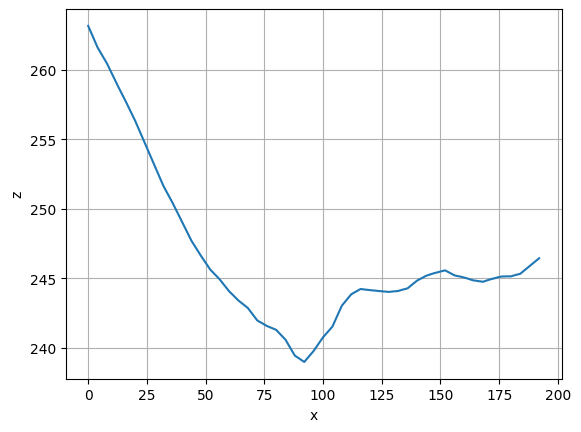

In [35]:
fig = plt.figure()

plt.plot(data_x[10], data_z[10])
plt.grid()
plt.xlabel('x')
plt.ylabel('z')
plt.show()

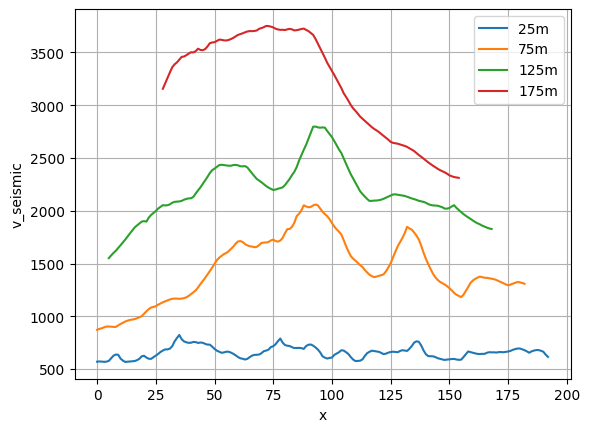

In [165]:
fig = plt.figure()

for i in [25, 75, 125, 175]:
    plt.plot(data_x[0], data_v[i], label= str(i) + 'm')

plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('v_seismic')
plt.show()

In [102]:
# print(data_z[0:50,0:50][0], data_v[0:50,0:50][1])

In [104]:
v_25 = np.nanmean(data_v[25:35])
v_60 = np.nanmean(data_v[60:81])
print(v_25, v_60)

print(np.shape(data_v[25:35]))

706.0492976066597 1360.429938160268
(10, 193)


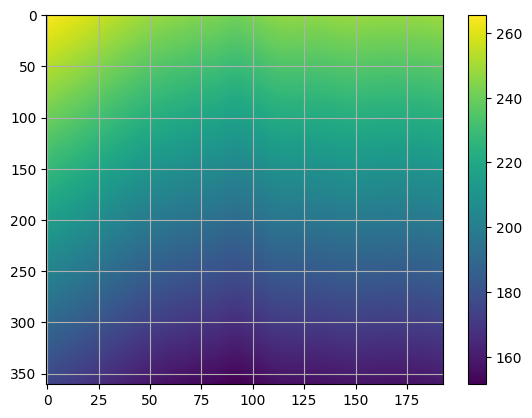

In [132]:
fig = plt.imshow(data_z, aspect='auto')
plt.grid()
plt.colorbar()
plt.show()

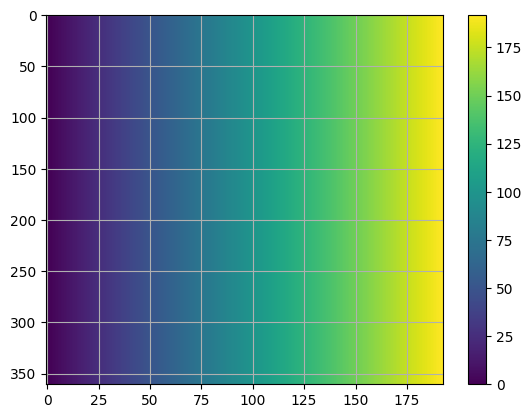

In [133]:
fig = plt.imshow(data_x, aspect='auto')
plt.grid()
plt.colorbar()
plt.show()

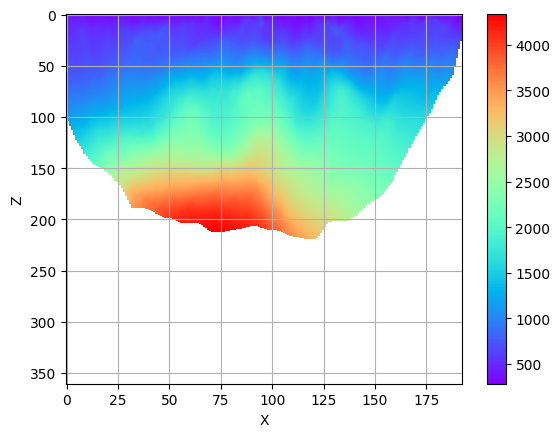

In [137]:


fig = plt.imshow(data_v, aspect='auto', cmap='rainbow')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.grid()
plt.show()

[  0.   1.   2. ... 190. 191. 192.]
[265.65 265.26 264.88 ... 158.68 158.81 158.95]
[385.69 395.61 404.1  ...    nan    nan    nan]


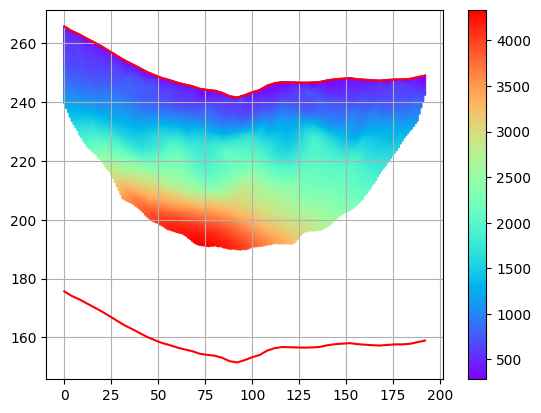

In [159]:
# ravel pour avoir les vitesses à chaque couche
print(data_x.ravel())
print(data_z.ravel())
print(data_v.ravel())
plt.figure()
plt.plot(data_x[0,:],data_z[0,:],'-r')
plt.plot(data_x[-1,:],data_z[-1,:],'-r')
plt.scatter(data_x.ravel(), data_z.ravel(), c=data_v.ravel(), cmap='rainbow', s=0.5)
plt.grid()
plt.colorbar()
plt.show()


In [117]:
# Exercice du MNT Reunion

zrun = np.loadtxt('réunion_mnt.txt', skiprows=6)
print(zrun)

[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


In [118]:
zrun[zrun==-9999]=np.nan
print(zrun)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


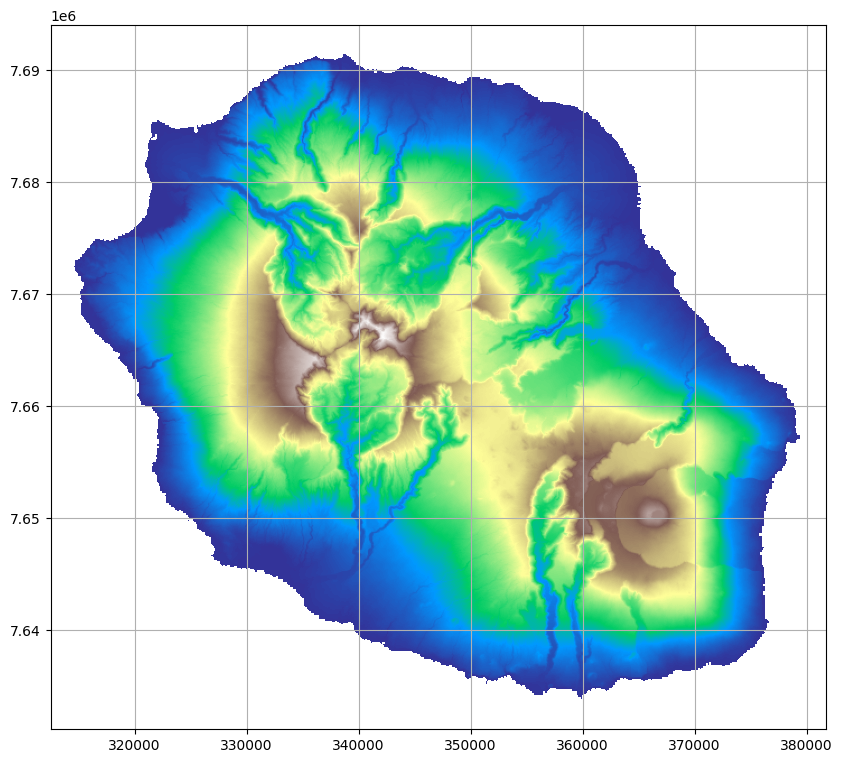

In [131]:
NCOLS = 692
NROWS = 629
XLLCORNER = 312500
YLLCORNER = 7631175
CELLSIZE = 100

xmin = XLLCORNER
xmax = xmin + NCOLS*CELLSIZE
ymin = YLLCORNER
ymax = ymin + NROWS*CELLSIZE

extent_run = [xmin, xmax, ymin, ymax]

plt.figure(figsize=[10,10])
plt.imshow(zrun, cmap='terrain', extent = extent_run)
plt.grid()
plt.show()